# Banking analysis and output prediction model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("/kaggle/input/banking-dataset-marketing-targets/train.csv",delimiter = ";")
test_data = pd.read_csv("/kaggle/input/banking-dataset-marketing-targets/test.csv",delimiter = ";")

In [3]:
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
train_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
train_data.groupby(['y']).mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


Check mean values for each output.
Lot of conlusions right there. 

Clients which subscribe to term deposit have much higer balance and were contacted more before campaign. 

Pdays is not correctly shown becuase of -1 appearing. 

In [6]:
train_data.loc[train_data["pdays"] == -1, "pdays"] = 999

In [7]:
train_data.groupby(['y']).mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,877.311107,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,708.521460,1.170354


After change from -1 to 999 it makes more sense, because clients which were informed newly tend to subscribe more. 

I should check it propably without 999 rows

In [8]:
train_data.loc[~(train_data["pdays"] == 999)].groupby(['y']).mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.499055,1427.837059,14.15932,215.990239,2.136650,234.191436,3.156014
yes,42.467192,1987.159055,14.72231,407.259843,1.787927,192.521785,3.249344


Prepare job_eq dataframe which will allow to show, how likely client is to subscribe base on his job

In [9]:
job_not_equalized = train_data.groupby(['y','job']).count()['age']

equalize_value = train_data.groupby(['y']).count()['age']['yes'] / train_data.groupby(['y']).count()['age']['no']

job_eq = pd.DataFrame()
job_eq["no"] = pd.Series(job_not_equalized["no"] * equalize_value, dtype="int64")
job_eq["yes"] = pd.Series(job_not_equalized["yes"],dtype="int64")
job_eq['diff'] = pd.Series(job_eq["yes"] - job_eq["no"],dtype="int64")

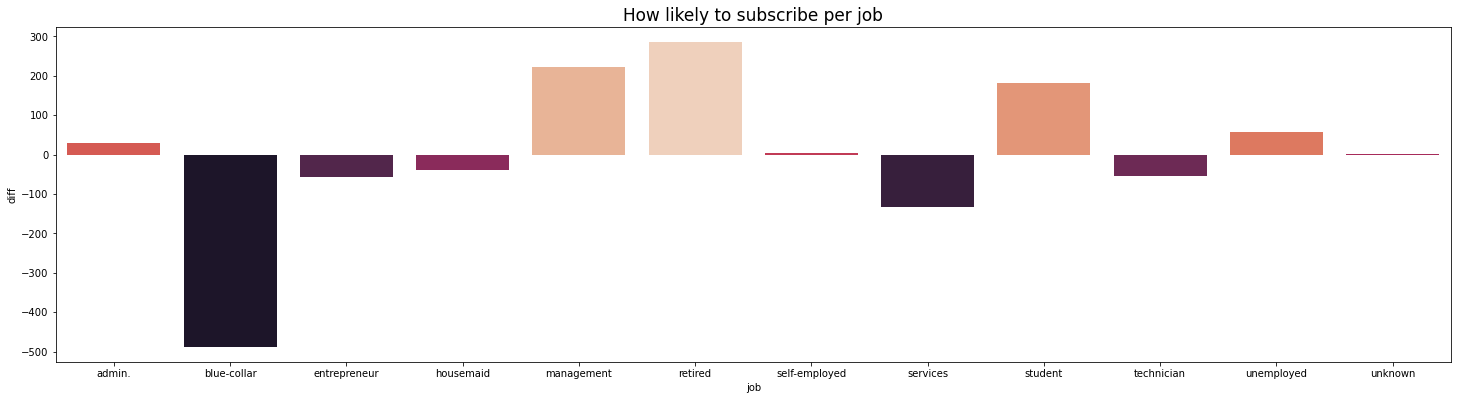

In [10]:
fig, ax = plt.subplots(figsize=(25,6))
b8 = sns.barplot(x="job",y="diff", hue="diff", data=job_eq.reset_index(),palette="rocket", dodge=False)
#b8.despine(left=True)
plt.subplots_adjust(top=0.9)
b8.set_title('How likely to subscribe per job', fontsize = 17)
ax.get_legend().remove()

In [ ]:
sns.set_style("darkgrid")

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
b0 = sns.distplot(train_data['age'], bins = 20, ax=ax, color = 'DarkBlue')
plt.subplots_adjust(top=0.9)
b0.set_title('AGE DISTRIBUTION', fontsize = 17)

In [ ]:
b1 = sns.catplot(x="job", kind="count", palette="ch:.25", data=train_data, aspect = 3, order = train_data['job'].value_counts().index)
plt.subplots_adjust(top=0.9)
b1.fig.suptitle('JOB DISTRIBUTION', fontsize = 17)

In [ ]:
b2 = sns.catplot(x="education", kind="count", palette="ch:.25", data=train_data, aspect = 3, order = train_data['education'].value_counts().index)
plt.subplots_adjust(top=0.9)
b2.fig.suptitle('EDUCATION DISTRIBUTION', fontsize = 17)

In [ ]:
b3 = sns.catplot(x="marital", kind="count", palette="ch:.25", data=train_data, aspect = 3, order = train_data['marital'].value_counts().index)
plt.subplots_adjust(top=0.9)
b3.fig.suptitle('MARITAL STATUS DISTRIBUTION', fontsize = 17)

In [ ]:
b4 = sns.catplot(x="y", kind="count", data=train_data)
plt.subplots_adjust(top=0.9)
b4.fig.suptitle('OUTPUT DISTRIBUTION', fontsize = 17)

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
b6 = sns.scatterplot(x="age", y="balance",hue="y", data=train_data,x_jitter=True, y_jitter=True,ax=ax,palette="binary",size="y",size_order=["yes", "no"], sizes=(30,45))
plt.subplots_adjust(top=0.9)
b6.set_title('BALANCE AND AGE TO OUTPUT', fontsize = 17)

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
b5 = sns.heatmap(train_data.corr(), ax=ax)
plt.subplots_adjust(top=0.9)
b5.set_title('CORRELATION BETWEEN INPUTS', fontsize = 17)

In [ ]:
#Writed own function for one hot encoding to have more power over it
#We need both train and test to match same categorical data
def one_hot_encode(train,test):
    #Get both sets of all possible values and union
    all_names = set(train).union(set(test))
    #Crate and numerate dict from it
    dict = {}
    for i,name in enumerate(all_names):
        dict[name] = i
    
    #Got through each row and create one hot vector
    output = []
    for row in train:
        element = [0] * len(all_names)
        element[dict[row]] = 1
        output.append(element)
    
    return output

In [ ]:
#Function for creating 0/1 from 'no'/'yes'
def binary_encode(data):
    output = []
    for row in data:
        if row == 'no':
            output.append([0])
        else:
            output.append([1])
    return output

In [ ]:
#Making function because we have splitted train and test set, so we can use it for both
#Output = X [num, num, ..., num] vector of all input values
def feature_prepare(train, test):
    #Prepare array of features, row = sample
    X = []
    categorical = ['job', 'marital', 'education', 'contact', 'campaign', 'poutcome']
    number = ['balance', 'duration', 'previous']
    binary = ['housing', 'default', 'loan']
    #Add age as value
    X.append(np.array(train['age'].values))
    X = np.array(X).T
    
    for cat in categorical:
        X = np.append(X, one_hot_encode(train[cat], test[cat]), axis=1)

    for num in number:
        X = np.append(X, np.array([train[num].values]).T, axis=1)

    for bina in binary:
        X = np.append(X, binary_encode(train[bina]), axis=1)
    
    Y = binary_encode(train["y"])
    return (X, Y)

In [ ]:
#Prepare both test and train sets
X, y = feature_prepare(train_data, test_data)
y = np.array(y).flatten()
X_test, y_test = feature_prepare(test_data, train_data)
y_test = np.array(y_test).flatten()

**Random Forest**

In [ ]:
#Check Random Forest with max_depth to avoid overfitting
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(max_depth = 6)
clf.fit(X, y)
print('Train set accuracy: {:.4f}'.format(clf.score(X,y)))
print('Test set accuracy: {:.4f}'.format(clf.score(X_test,y_test)))

In [ ]:
#Kfold on Random Forest
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True ,random_state = 2020)
for tra, tes in kf.split(X):
    X = np.array(X)
    y = np.array(y)
    X_train, X_test = X[tra], X[tes]
    y_train, y_test = y[tra], y[tes]
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

**Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier()
ada_boost.fit(X,y)
print('Train set accuracy: {:.4f}'.format(ada_boost.score(X,y)))
print('Test set accuracy: {:.4f}'.format(ada_boost.score(X_test,y_test)))

**XGBoost**

In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test, label=y_test)
param = { 'max_depth':4, 'eta':1 , 'objective': 'binary:logistic', 'eval_metric': 'error'}
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
xg_boost = xgb.train(param, dtrain, 2, watchlist)